In [2]:
import pandas as pd # type: ignore
from sklearn.preprocessing import MinMaxScaler # type: ignore

rawData = pd.read_csv('data.csv')
infoData = pd.DataFrame()
infoData['FLAG'] = rawData['FLAG']
infoData['CONS_NO'] = rawData['CONS_NO']
data = rawData.drop(['FLAG', 'CONS_NO'], axis=1)

dropIndex = data[data.duplicated()].index  # duplicates drop
data = data.drop(dropIndex, axis=0)
infoData = infoData.drop(dropIndex, axis=0)

zeroIndex = data[(data.sum(axis=1) == 0)].index  # zero rows drop
data = data.drop(zeroIndex, axis=0)
infoData = infoData.drop(zeroIndex, axis=0)

data.columns = pd.to_datetime(data.columns)  # columns reindexing according to dates
data = data.reindex(sorted(data.columns), axis=1)
cols = data.columns

data.reset_index(inplace=True, drop=True)  # index sorting
infoData.reset_index(inplace=True, drop=True)

data = data.interpolate(method='linear', limit=2,  # filling NaN values
                        limit_direction='both', axis=0).fillna(0)

for i in range(data.shape[0]):  # outliers treatment
    m = data.loc[i].mean()
    st = data.loc[i].std()
    data.loc[i] = data.loc[i].mask(data.loc[i] > (m + 3 * st), other=m + 3 * st)

data.to_csv(r'visualization.csv', index=False, header=True)  # preprocessed data without scaling

scale = MinMaxScaler()
scaled = scale.fit_transform(data.values.T).T
mData = pd.DataFrame(data=scaled, columns=data.columns)
print(mData)
preprData = pd.concat([infoData, mData], axis=1, sort=False)  # Back to initial format
print(preprData)
preprData.to_csv(r'preprocessedR.csv', index=False, header=True)

       2014-01-01  2014-01-02  2014-01-03  2014-01-04  2014-01-05  2014-01-06  \
0        0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
1        0.108235    0.210498    0.260883    0.123910    0.134734    0.199674   
2        0.077443    0.150614    0.186665    0.088659    0.096404    0.142869   
3        0.111323    0.216503    0.268326    0.127445    0.138577    0.205371   
4        0.141255    0.269839    0.339762    0.168473    0.179267    0.260453   
...           ...         ...         ...         ...         ...         ...   
40251    0.330066    0.156642    0.152912    0.507221    0.798437    0.694631   
40252    0.275157    0.000000    0.000000    0.582925    0.616556    0.592097   
40253    0.078565    0.157130    0.124620    0.132748    0.208604    0.186931   
40254    0.417892    0.374841    0.477026    0.425315    0.415666    0.432490   
40255    0.444454    0.398666    0.507346    0.452348    0.442086    0.459979   

       2014-01-07  2014-01-

/var/folders/4h/r0yxx7ms7dqbwz2919p9hj840000gn/T/ipykernel_61314/2874345153.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs5[0].set_xticklabels([''] + alpha)
/var/folders/4h/r0yxx7ms7dqbwz2919p9hj840000gn/T/ipykernel_61314/2874345153.py:112: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs5[0].set_yticklabels([''] + alpha)
/var/folders/4h/r0yxx7ms7dqbwz2919p9hj840000gn/T/ipykernel_61314/2874345153.py:122: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs5[1].set_xticklabels([''] + alpha)
/var/folders/4h/r0yxx7ms7dqbwz2919p9hj840000gn/T/ipykernel_61314/2874345153.py:123: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs5[1].set_yticklabels([''] + alpha)


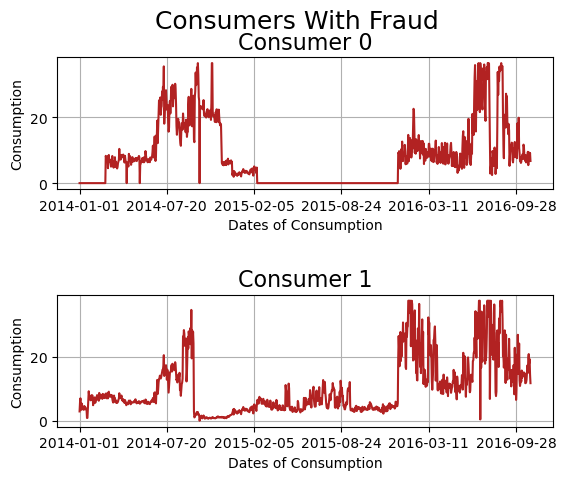

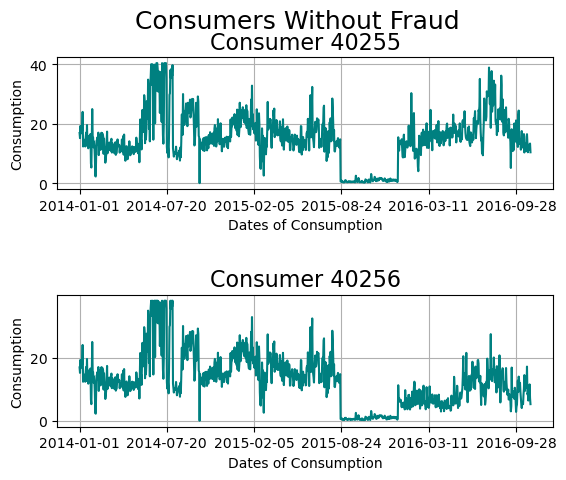

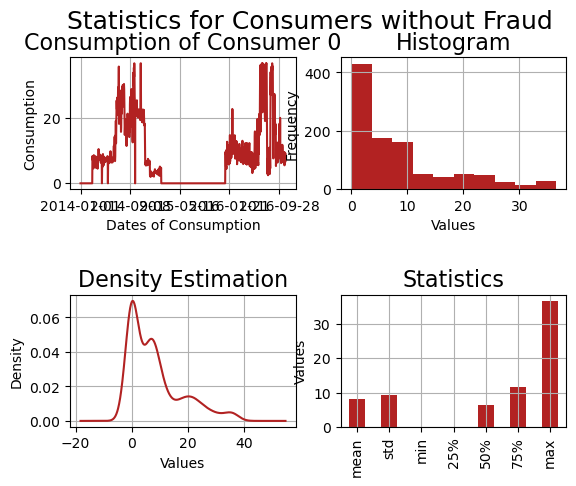

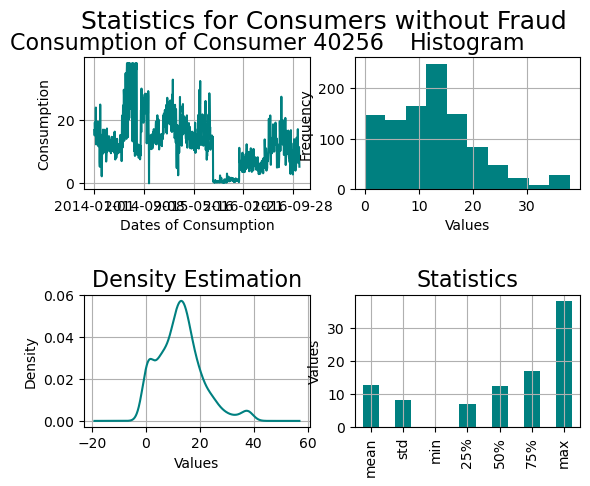

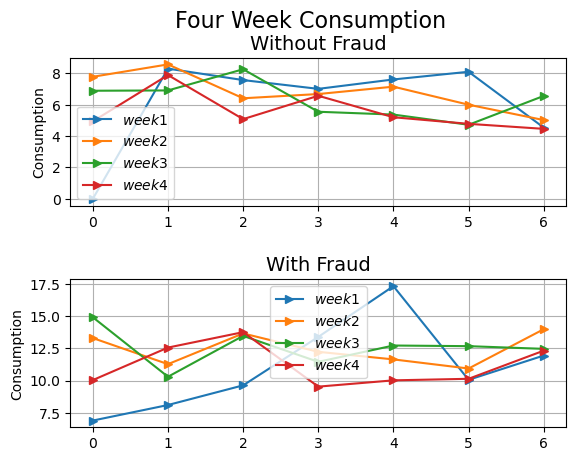

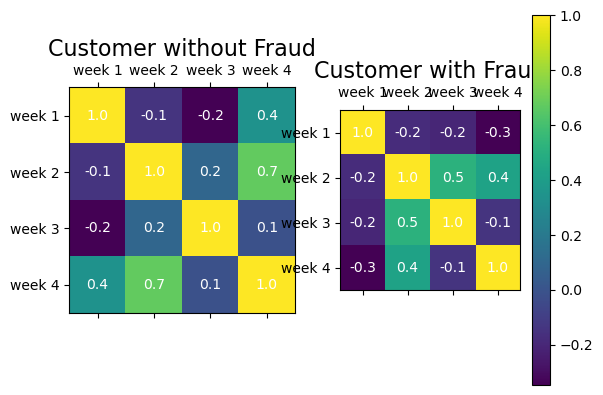

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

rawData1 = pd.read_csv('visualization.csv', nrows=3)
cols = rawData1.columns
rawData2 = pd.read_csv('visualization.csv', skiprows=40254)
rawData2.columns = cols
data = pd.concat([rawData1, rawData2], ignore_index=True)

fig, axs = plt.subplots(2, 1)
fig.suptitle('Consumers With Fraud', fontsize=18)
plt.subplots_adjust(hspace=0.8)

data.loc[0].plot(ax=axs[0], color='firebrick', grid=True)
axs[0].set_title('Consumer 0', fontsize=16)
axs[0].set_xlabel('Dates of Consumption')
axs[0].set_ylabel('Consumption')

data.loc[2].plot(ax=axs[1], color='firebrick', grid=True)
axs[1].set_title('Consumer 1', fontsize=16)
axs[1].set_xlabel('Dates of Consumption')
axs[1].set_ylabel('Consumption')

fig, axs = plt.subplots(2, 1)
fig.suptitle('Consumers Without Fraud', fontsize=18)
plt.subplots_adjust(hspace=0.8)

data.loc[3].plot(ax=axs[0], color='teal', grid=True)
axs[0].set_title('Consumer 40255', fontsize=16)
axs[0].set_xlabel('Dates of Consumption')
axs[0].set_ylabel('Consumption')

data.loc[4].plot(ax=axs[1], color='teal', grid=True)
axs[1].set_title('Consumer 40256', fontsize=16)
axs[1].set_xlabel('Dates of Consumption')
axs[1].set_ylabel('Consumption')

fig2, axs2 = plt.subplots(2, 2)
fig2.suptitle('Statistics for Consumers without Fraud', fontsize=18)
plt.subplots_adjust(hspace=0.8)

data.loc[0].plot(ax=axs2[0, 0], color='firebrick', grid=True)
axs2[0, 0].set_title('Consumption of Consumer 0', fontsize=16)
axs2[0, 0].set_xlabel('Dates of Consumption')
axs2[0, 0].set_ylabel('Consumption')

data.loc[0].hist(color='firebrick', ax=axs2[0, 1], grid=True)
axs2[0, 1].set_title('Histogram', fontsize=16)
axs2[0, 1].set_xlabel('Values')
axs2[0, 1].set_ylabel('Frequency')

data.loc[0].plot.kde(color='firebrick', ax=axs2[1, 0], grid=True)
axs2[1, 0].set_title('Density Estimation', fontsize=16)
axs2[1, 0].set_xlabel('Values')
axs2[1, 0].set_ylabel('Density')

data.loc[0].describe().drop(['count']).plot(kind='bar', ax=axs2[1, 1], color='firebrick', grid=True)
axs2[1, 1].set_title('Statistics', fontsize=16)
axs2[1, 1].set_ylabel('Values')

fig3, axs3 = plt.subplots(2, 2)
fig3.suptitle('Statistics for Consumers without Fraud', fontsize=18)
plt.subplots_adjust(hspace=0.8)
data.loc[4].plot(ax=axs3[0, 0], color='teal', grid=True)
axs3[0, 0].set_title('Consumption of Consumer 40256', fontsize=16)
axs3[0, 0].set_xlabel('Dates of Consumption')
axs3[0, 0].set_ylabel('Consumption')

data.loc[4].hist(color='teal', ax=axs3[0, 1])
axs3[0, 1].set_title('Histogram', fontsize=16)
axs3[0, 1].set_xlabel('Values')
axs3[0, 1].set_ylabel('Frequency')

data.loc[4].plot.kde(color='teal', ax=axs3[1, 0], grid=True)
axs3[1, 0].set_title('Density Estimation', fontsize=16)
axs3[1, 0].set_xlabel('Values')
axs3[1, 0].set_ylabel('Density')

data.loc[4].describe().drop(['count']).plot(kind='bar', ax=axs3[1, 1], color='teal', grid=True)
axs3[1, 1].set_title('Statistics', fontsize=16)
axs3[1, 1].set_ylabel('Values')

fig4, axs4 = plt.subplots(2, 1)
fig4.suptitle('Four Week Consumption', fontsize=16)
plt.subplots_adjust(hspace=0.5)

for i in range(59, 83, 7):
    axs4[0].plot(data.iloc[0, i:i + 7].to_numpy(), marker='>', linestyle='-', label='$week {i}$'.format(i=(i % 58) % 6))
axs4[0].legend(loc='best')
axs4[0].set_title('Without Fraud', fontsize=14)
axs4[0].set_ylabel('Consumption')
axs4[0].grid(True)

for i in range(59, 83, 7):
    axs4[1].plot(data.iloc[4, i:i + 7].to_numpy(), marker='>', linestyle='-', label='$week {i}$'.format(i=(i % 58) % 6))
axs4[1].legend(loc='best')
axs4[1].set_title('With Fraud', fontsize=14)
axs4[1].set_ylabel('Consumption')
axs4[1].grid(True)

fig5, axs5 = plt.subplots(1, 2)
a = []
for i in range(59, 83, 7):
    a.append(data.iloc[0, i:i + 7].to_numpy())
cor = pd.DataFrame(a).transpose().corr()
cax = axs5[0].matshow(cor)
for (i, j), z in np.ndenumerate(cor):
    axs5[0].text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color='white')
alpha = ['week 1', 'week 2', 'week 3', 'week 4']
axs5[0].set_xticklabels([''] + alpha)
axs5[0].set_yticklabels([''] + alpha)
axs5[0].set_title('Customer without Fraud', fontsize=16)

a = []
for i in range(59, 83, 7):
    a.append(data.iloc[4, i:i + 7].to_numpy())
cor = pd.DataFrame(a).transpose().corr()
cax = axs5[1].matshow(cor)
for (i, j), z in np.ndenumerate(cor):
    axs5[1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center', color='white')
axs5[1].set_xticklabels([''] + alpha)
axs5[1].set_yticklabels([''] + alpha)
axs5[1].set_title('Customer with Fraud', fontsize=16)
fig5.colorbar(cax)
# plt.close('all')
plt.show()

In [18]:
import pandas as pd# type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, confusion_matrix, precision_recall_fscore_support, roc_auc_score# type: ignore
from tensorflow.keras import Sequential# type: ignore
import tensorflow as tf# type: ignore
from tensorflow import keras# type: ignore
from tensorflow.python.keras.layers import Dense, Conv1D, Flatten, Conv2D,Input# type: ignore
from sklearn.linear_model import LogisticRegression# type: ignore
from sklearn.ensemble import RandomForestClassifier# type: ignore
from sklearn.tree import DecisionTreeClassifier# type: ignore
from sklearn.svm import SVC# type: ignore
import numpy as np# type: ignore
from sklearn.model_selection import GridSearchCV# type: ignore
from imblearn.over_sampling import SMOTE# type: ignore
from test import ModuleWrapper
import pickle

tf.random.set_seed(1234)
epochs_number = 1  # number of epochs for the neural networks
test_set_size = 0.1  # percentage of the test size comparing to the whole dataset
oversampling_flag = 0  # set to 1 to over-sample the minority class
oversampling_percentage = 0.2  # percentage of the minority class after the oversampling comparing to majority class


# Definition of functions
def read_data():
    rawData = pd.read_csv('preprocessedR.csv')

    # Setting the target and dropping the unnecessary columns
    y = rawData[['FLAG']]
    X = rawData.drop(['FLAG', 'CONS_NO'], axis=1)

    print('Normal Consumers:                    ', y[y['FLAG'] == 0].count()[0])
    print('Consumers with Fraud:                ', y[y['FLAG'] == 1].count()[0])
    print('Total Consumers:                     ', y.shape[0])
    print("Classification assuming no fraud:     %.2f" % (y[y['FLAG'] == 0].count()[0] / y.shape[0] * 100), "%")

    # columns reindexing according to dates
    X.columns = pd.to_datetime(X.columns)
    X = X.reindex(X.columns, axis=1)

    # Splitting the dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y['FLAG'], test_size=test_set_size, random_state=0)
    print("Test set assuming no fraud:           %.2f" % (y_test[y_test == 0].count() / y_test.shape[0] * 100), "%\n")

    # Oversampling of minority class to encounter the imbalanced learning
    if oversampling_flag == 1:
        over = SMOTE(sampling_strategy=oversampling_percentage, random_state=0)
        X_train, y_train = over.fit_resample(X_train, y_train)
        print("Oversampling statistics in training set: ")
        print('Normal Consumers:                    ', y_train[y_train == 0].count())
        print('Consumers with Fraud:                ', y_train[y_train == 1].count())
        print("Total Consumers                      ", X_train.shape[0])

    return X_train, X_test, y_train, y_test


def results(y_test, prediction):
    print("Accuracy", 100 * accuracy_score(y_test, prediction))
    print("RMSE:", mean_squared_error(y_test, prediction, squared=False))
    print("MAE:", mean_absolute_error(y_test, prediction))
    print("F1:", 100 * precision_recall_fscore_support(y_test, prediction)[2])
    print("AUC:", 100 * roc_auc_score(y_test, prediction))
    print(confusion_matrix(y_test, prediction), "\n")


def ANN(X_train, X_test, y_train, y_test):
    print('Artificial Neural Network:')
    # for i in range(4,100,3):
    #     print("Epoch:",i)

    # Model creation
    model = Sequential()
    model.add(Dense(1000, input_dim=1034, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])

    # model.fit(X_train, y_train, validation_split=0, epochs=i, shuffle=True, verbose=0)
    model.fit(X_train, y_train, validation_split=0, epochs=epochs_number, shuffle=True, verbose=1)
    prediction = (model.predict(X_test)>0.5).astype("int32")
    model.summary()
    results(y_test, prediction)


def CNN1D(X_train, X_test, y_train, y_test):
    print('1D - Convolutional Neural Network:')

    # Transforming the dataset into tensors
    X_train = X_train.to_numpy().reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.to_numpy().reshape(X_test.shape[0], X_test.shape[1], 1)

    # Model creation
    model = Sequential()
    model.add(Conv1D(100, kernel_size=7, input_shape=(1034, 1), activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])

    # model.fit(X_train, y_train, epochs=1, validation_split=0.1, shuffle=False, verbose=1)
    model.fit(X_train, y_train, epochs=epochs_number, validation_split=0, shuffle=False, verbose=1)
    prediction = (model.predict(X_test)>0.5).astype("int32")
    model.summary()
    results(y_test, prediction)

def CNN2D(X_train, X_test, y_train, y_test):
    print('2D - Convolutional Neural Network:')

    # Transforming every row of the train set into a 2D array and then into a tensor
    n_array_X_train = X_train.to_numpy()
    n_array_X_train_extended = np.hstack((n_array_X_train, np.zeros(
        (n_array_X_train.shape[0], 2))))  # adding two empty columns in order to make the number of columns
    # an exact multiple of 7
    week = []
    for i in range(n_array_X_train_extended.shape[0]):
        a = np.reshape(n_array_X_train_extended[i], (-1, 7, 1))
        week.append(a)
    X_train_reshaped = np.array(week)

    # Transforming every row of the train set into a 2D array and then into a tensor
    n_array_X_test = X_test.to_numpy()  # X_test to 2D - array
    n_array_X_train_extended = np.hstack((n_array_X_test, np.zeros((n_array_X_test.shape[0], 2))))
    week2 = []
    for i in range(n_array_X_train_extended.shape[0]):
        b = np.reshape(n_array_X_train_extended[i], (-1, 7, 1))
        week2.append(b)
    X_test_reshaped = np.array(week2)

    input_shape = (1, 148, 7, 1)  # input shape of the tensor

    # Model creation
    model = Sequential()
    model.add(Conv2D(kernel_size=(7, 3), filters=32, input_shape=input_shape[1:], activation='relu',
                     data_format='channels_last'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])
    # model.summary()
    #     model.fit(X_train_reshaped, y_train, validation_split=0.1, epochs=i, shuffle=False, verbose=0)
    model.fit(X_train_reshaped, y_train, validation_split=0.1, epochs=epochs_number, shuffle=False, verbose=1)

    model.save("my_model.h5",include_optimizer = True)

    # prediction = model.predict_classes(X_test)
    prediction = (model.predict(X_test_reshaped)>0.5).astype("int32")
    model.summary()
    results(y_test, prediction)

def LR(X_train, X_test, y_train, y_test):
    print('Logistic Regression:')
    '''
    # Parameters selection 
    param_grid = {'C': [0.1,1,10,100],'solver': ['newton-cg', 'lbfgs']}
    grid = GridSearchCV(LogisticRegression(max_iter=1000,random_state=0), param_grid=param_grid, n_jobs=-1)
    grid.fit(X_train, y_train)
    df = pd.DataFrame(grid.cv_results_)
    print(df[['param_C', 'param_solver', 'mean_test_score', 'rank_test_score']])
    '''
    model = LogisticRegression(C=1000, max_iter=1000, n_jobs=-1, solver='newton-cg')
    model.fit(X_train, y_train)
    prediction = (model.predict(X_test)>0.5).astype("int32")
    results(y_test, prediction)


def DT(X_train, X_test, y_train, y_test):
    print('Decision Tree:')
    model = DecisionTreeClassifier(random_state=0)
    model.fit(X_train, y_train)
    prediction = (model.predict(X_test)>0.5).astype("int32")
    results(y_test, prediction)


def RF(X_train, X_test, y_train, y_test):
    print('Random Forest:')
    '''
    # Parameters selection 
    param_grid = {'n_estimators':[10,100,1000]}
    grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=param_grid, n_jobs=-1)
    grid.fit(X_train, y_train)
    df = pd.DataFrame(grid.cv_results_)
    print(df[['param_criterion', 'mean_test_score', 'rank_test_score']])
    '''

    model = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, max_features='auto',  # max_depth=10,
                                   random_state=0, n_jobs=-1)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    results(y_test, prediction)


def SVM(X_train, X_test, y_train, y_test):
    model = SVC(random_state=0)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    results(y_test, prediction)


# ----Main----
X_train, X_test, y_train, y_test = read_data()

# Uncomment any model to test
#ANN(X_train, X_test, y_train, y_test)
# CNN1D(X_train, X_test, y_train, y_test)
CNN2D(X_train, X_test, y_train, y_test)
# RF(X_train, X_test, y_train, y_test)
# LR(X_train, X_test, y_train, y_test)
# DT(X_train, X_test, y_train, y_test)
# SVM(X_train, X_test, y_train, y_test)

Normal Consumers:                     36677
Consumers with Fraud:                 3579
Total Consumers:                      40256
Classification assuming no fraud:     91.11 %
Test set assuming no fraud:           90.78 %

2D - Convolutional Neural Network:
1019/1019 [==============================] - 8s 7ms/step - loss: 0.2737 - accuracy: 0.9120 - val_loss: 0.2523 - val_accuracy: 0.9144


/Users/spandanmn/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


NotImplementedError: 
Layer ModuleWrapper was created by passing
non-serializable argument values in `__init__()`,
and therefore the layer must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, confusion_matrix, \
    precision_recall_fscore_support, roc_auc_score
from tensorflow.keras import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense, Conv1D, Flatten, Conv2D
import numpy as np
from imblearn.over_sampling import SMOTE

tf.random.set_seed(1234)
epochs_number = 1  # number of epochs for the neural networks
test_set_size = 0.1  # percentage of the test size comparing to the whole dataset
oversampling_flag = 0  # set to 1 to over-sample the minority class
oversampling_percentage = 0.2  # percentage of the minority class after the oversampling comparing to majority class


# Definition of functions
def read_data():
    rawData = pd.read_csv('preprocessedR.csv')

    # Setting the target and dropping the unnecessary columns
    y = rawData[['FLAG']]
    X = rawData.drop(['FLAG', 'CONS_NO'], axis=1)

    print('Normal Consumers:                    ', y[y['FLAG'] == 0].count()[0])
    print('Consumers with Fraud:                ', y[y['FLAG'] == 1].count()[0])
    print('Total Consumers:                     ', y.shape[0])
    print("Classification assuming no fraud:     %.2f" % (y[y['FLAG'] == 0].count()[0] / y.shape[0] * 100), "%")

    # columns reindexing according to dates
    X.columns = pd.to_datetime(X.columns)
    X = X.reindex(X.columns, axis=1)

    # Splitting the dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y['FLAG'], test_size=test_set_size, random_state=0)
    print("Test set assuming no fraud:           %.2f" % (y_test[y_test == 0].count() / y_test.shape[0] * 100), "%\n")

    # Oversampling of minority class to encounter the imbalanced learning
    if oversampling_flag == 1:
        over = SMOTE(sampling_strategy=oversampling_percentage, random_state=0)
        X_train, y_train = over.fit_resample(X_train, y_train)
        print("Oversampling statistics in training set: ")
        print('Normal Consumers:                    ', y_train[y_train == 0].count())
        print('Consumers with Fraud:                ', y_train[y_train == 1].count())
        print("Total Consumers                      ", X_train.shape[0])

    return X_train, X_test, y_train, y_test


def results(y_test, prediction):
    print("Accuracy", 100 * accuracy_score(y_test, prediction))
    print("RMSE:", mean_squared_error(y_test, prediction, squared=False))
    print("MAE:", mean_absolute_error(y_test, prediction))
    print("F1:", 100 * precision_recall_fscore_support(y_test, prediction)[2])
    print("AUC:", 100 * roc_auc_score(y_test, prediction))
    print(confusion_matrix(y_test, prediction), "\n")


def ANN(X_train, X_test, y_train, y_test):
    print('Artificial Neural Network:')

    # Model creation
    model = Sequential()
    model.add(Dense(1000, input_dim=1034, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])

    model.summary()

    for i in range(1, 100, 3):
        print("Epoch:", i)
        model.fit(X_train, y_train, validation_split=0, epochs=i, shuffle=True, verbose=0)
        prediction = model.predict_classes(X_test)
        results(y_test, prediction)


def CNN1D(X_train, X_test, y_train, y_test):
    print('1D - Convolutional Neural Network:')

    # Transforming the dataset into tensors
    X_train = X_train.to_numpy().reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.to_numpy().reshape(X_test.shape[0], X_test.shape[1], 1)

    # Model creation
    model = Sequential()
    model.add(Conv1D(100, kernel_size=7, input_shape=(1034, 1), activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])
    model.summary()

    for i in range(1, 100, 3):
        print("Epoch:", i)
        model.fit(X_train, y_train, epochs=i, validation_split=0.1, shuffle=False, verbose=0)
        prediction = model.predict_classes(X_test)

        results(y_test, prediction)


def CNN2D(X_train, X_test, y_train, y_test):
    print('2D - Convolutional Neural Network:')

    # Transforming every row of the train set into a 2D array and then into a tensor
    n_array_X_train = X_train.to_numpy()
    n_array_X_train_extended = np.hstack((n_array_X_train, np.zeros(
        (n_array_X_train.shape[0], 2))))  # adding two empty columns in order to make the number of columns
    # an exact multiple of 7
    week = []
    for i in range(n_array_X_train_extended.shape[0]):
        a = np.reshape(n_array_X_train_extended[i], (-1, 7, 1))
        week.append(a)
    X_train_reshaped = np.array(week)

    # Transforming every row of the train set into a 2D array and then into a tensor
    n_array_X_test = X_test.to_numpy()  # X_test to 2D - array
    n_array_X_train_extended = np.hstack((n_array_X_test, np.zeros((n_array_X_test.shape[0], 2))))
    week2 = []
    for i in range(n_array_X_train_extended.shape[0]):
        b = np.reshape(n_array_X_train_extended[i], (-1, 7, 1))
        week2.append(b)
    X_test_reshaped = np.array(week2)

    input_shape = (1, 148, 7, 1)  # input shape of the tensor

    # Model creation
    model = Sequential()
    model.add(Conv2D(kernel_size=(7, 3), filters=32, input_shape=input_shape[1:], activation='relu',
                     data_format='channels_last'))
    model.add(Flatten())
    # model.add(Dense(100, activation='relu'))
    # model.add(Dense(100, activation='relu'))
    # model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])
    model.build(input_shape)
    model.summary()

    for i in range(1, 100, 3):
        print("Epoch:", i)
        model.fit(X_train_reshaped, y_train, validation_split=0.1, epochs=i, shuffle=False, verbose=0)
        prediction = (model.predict(X_test_reshaped)>0.5).astype("int32")
        results(y_test, prediction)


# ----Main----
X_train, X_test, y_train, y_test = read_data()

# Uncomment any model to test
# ANN(X_train, X_test, y_train, y_test)
# CNN1D(X_train, X_test, y_train, y_test)
CNN2D(X_train, X_test, y_train, y_test)

Normal Consumers:                     36677
Consumers with Fraud:                 3579
Total Consumers:                      40256
Classification assuming no fraud:     91.11 %
Test set assuming no fraud:           90.78 %

2D - Convolutional Neural Network:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_9 (ModuleWr  (1, 142, 5, 32)           704       
 apper)                                                          
                                                                 
 module_wrapper_10 (ModuleW  (1, 22720)                0         
 rapper)                                                         
                                                                 
 module_wrapper_11 (ModuleW  (1, 1)                    22721     
 rapper)                                                         
                                                           

KeyboardInterrupt: 